In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
%matplotlib inline
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats.mstats import winsorize

In [2]:
pwd

'/home/dhatri/Internship'

In [3]:
data = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False, na_values=['nan', '?'])

In [4]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [6]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Time'] = pd.to_timedelta(data['Time'])

data['Datetime'] = data['Date'] + data['Time']

In [7]:
data.set_index('Datetime', inplace=True)

In [8]:
data.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='Datetime', length=2075259, freq=None)

In [9]:
data.index.freq = 'min'

In [10]:
data.index.dtype

dtype('<M8[ns]')

In [11]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,0 days 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,2006-12-16,0 days 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,2006-12-16,0 days 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,2006-12-16,0 days 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,2006-12-16,0 days 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [13]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [14]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [15]:
data.fillna(method='ffill', inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Freq: T
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [17]:
data['rem_consumption'] = (data['Global_active_power'] * 1000 / 60 - 
                               data['Sub_metering_1'] - data['Sub_metering_2'] - data['Sub_metering_3'])

In [18]:
hourly_data = data.resample(rule='1H').sum()

In [19]:
hourly_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,rem_consumption
Datetime,,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0,1907.733333
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0,2217.200000
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0,2313.233333
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0,2261.566667
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0,1998.466667
...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,103.554,3.684,14224.18,433.0,0.0,0.0,772.0,953.900000
2010-11-26 18:00:00,94.408,3.222,14251.91,397.2,0.0,0.0,0.0,1573.466667
2010-11-26 19:00:00,99.560,3.602,14204.46,423.4,0.0,4.0,0.0,1655.333333


### Removing outliers

In [20]:
# Columns to winsorize 
columns_to_winsorize = data.columns

# Apply winsorization using scipy.stats.mstats.winsorize
for col in columns_to_winsorize:
    hourly_data[col + '_winsorized'] = winsorize(hourly_data[col], limits=(0.05, 0.05))

In [21]:
# smoothed_data = hourly_data['Global_active_power_winsorized'].rolling(window=3, center=True).mean()
# smoothed_data = smoothed_data.fillna(hourly_data['Global_active_power_winsorized'])

In [22]:
# hourly_data['GAP final'] = smoothed_data

In [23]:
# smoothed_data = hourly_data['Global_reactive_power_winsorized'].rolling(window=3, center=True).mean()
# smoothed_data = smoothed_data.fillna(hourly_data['Global_reactive_power_winsorized'])
# hourly_data['GRP final'] = smoothed_data

In [24]:
# smoothed_data = hourly_data['Global_intensity_winsorized'].rolling(window=3, center=True).mean()
# smoothed_data = smoothed_data.fillna(hourly_data['Global_intensity_winsorized'])
# hourly_data['GI final'] = smoothed_data

In [25]:
# smoothed_data = hourly_data['Voltage_winsorized'].rolling(window=3, center=True).mean()
# smoothed_data = smoothed_data.fillna(hourly_data['Voltage_winsorized'])
# hourly_data['V final'] = smoothed_data

Smoothing did not help much

In [26]:
hourly_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,rem_consumption,Global_active_power_winsorized,Global_reactive_power_winsorized,Voltage_winsorized,Global_intensity_winsorized,Sub_metering_1_winsorized,Sub_metering_2_winsorized,Sub_metering_3_winsorized,rem_consumption_winsorized
Datetime,,,,,,,,,,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0,1907.733333,152.024,8.244,14131.81,651.6,0.0,19.0,607.0,1668.266667
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0,2217.200000,171.416,4.802,14131.81,722.0,0.0,393.0,1012.0,1668.266667
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0,2313.233333,171.416,5.114,14131.81,722.0,0.0,86.0,1001.0,1668.266667
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0,2261.566667,171.416,4.506,14131.81,722.0,0.0,0.0,1007.0,1668.266667
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0,1998.466667,171.416,4.600,14229.52,722.0,0.0,25.0,1033.0,1668.266667


In [27]:
hourly_data['hour'] = hourly_data.index.hour
hourly_data['day_of_week'] = hourly_data.index.dayofweek
hourly_data['month'] = hourly_data.index.month
hourly_data['year'] = hourly_data.index.year

In [28]:
def map_hour_category(hour):
    if 23 >= hour >= 23 or 0 <= hour <= 6:
        return 0
    elif 7 <= hour <= 13:
        return 2
    elif 14 <= hour <= 17:
        return 1
    elif 18 <= hour <= 22:
        return 3

def map_day_category(day):
    if 0 <= day <= 4:
        return 0
    elif day == 5 or day == 6:
        return 1

def map_month_category(month):
    if month in [1, 12]:
        return 3
    elif month in [2, 3, 10, 11]:
        return 2
    elif month in [4, 5, 6, 9]:
        return 1
    elif month in [7, 8]:
        return 0
    
def map_year_category(year):
    if year == 2006:
        return 1
    else:
        return 0

In [29]:
hourly_data['hour_category'] = hourly_data['hour'].apply(map_hour_category)
hourly_data['day_category'] = hourly_data['day_of_week'].apply(map_day_category)
hourly_data['month_category'] = hourly_data['month'].apply(map_month_category)
hourly_data['year_category'] = hourly_data['year'].apply(map_year_category)

In [30]:
hourly_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,rem_consumption,Global_active_power_winsorized,Global_reactive_power_winsorized,...,Sub_metering_3_winsorized,rem_consumption_winsorized,hour,day_of_week,month,year,hour_category,day_category,month_category,year_category
Datetime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0,1907.733333,152.024,8.244,...,607.0,1668.266667,17,5,12,2006,1,1,3,1
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0,2217.200000,171.416,4.802,...,1012.0,1668.266667,18,5,12,2006,3,1,3,1
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0,2313.233333,171.416,5.114,...,1001.0,1668.266667,19,5,12,2006,3,1,3,1
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0,2261.566667,171.416,4.506,...,1007.0,1668.266667,20,5,12,2006,3,1,3,1
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0,1998.466667,171.416,4.600,...,1033.0,1668.266667,21,5,12,2006,3,1,3,1


In [31]:
hourly_consumption = hourly_data.groupby('hour')['Global_active_power'].mean()
hour_labels = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am',
              '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', 
              '7pm', '8pm', '9pm', '10pm', '11pm']

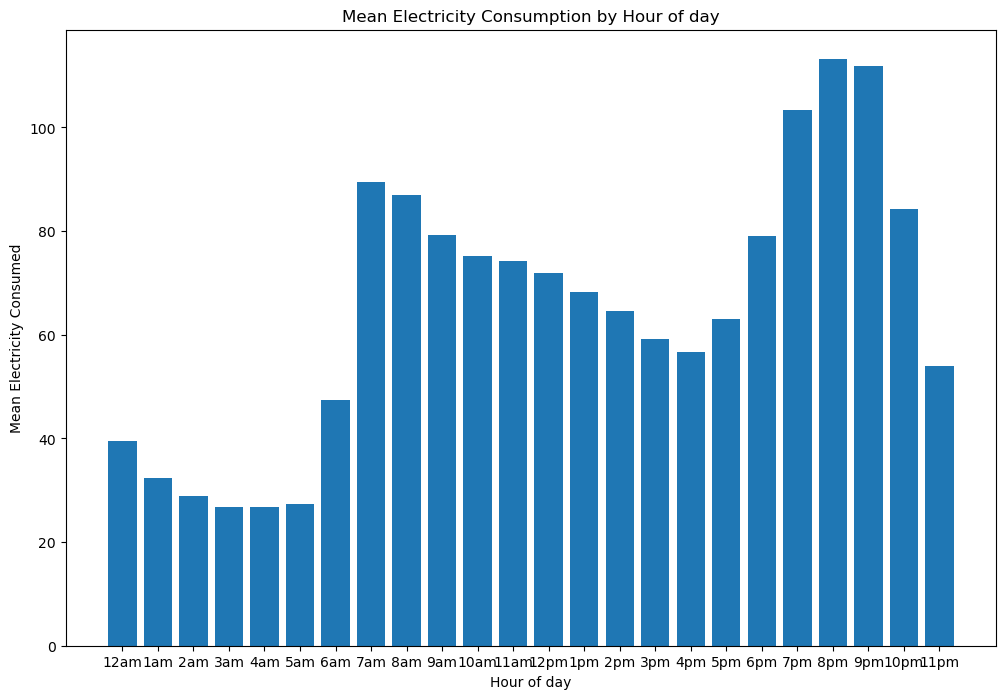

In [32]:
plt.bar(hourly_consumption.index, hourly_consumption.values, tick_label=hour_labels)
plt.xlabel('Hour of day')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Hour of day')
plt.show()

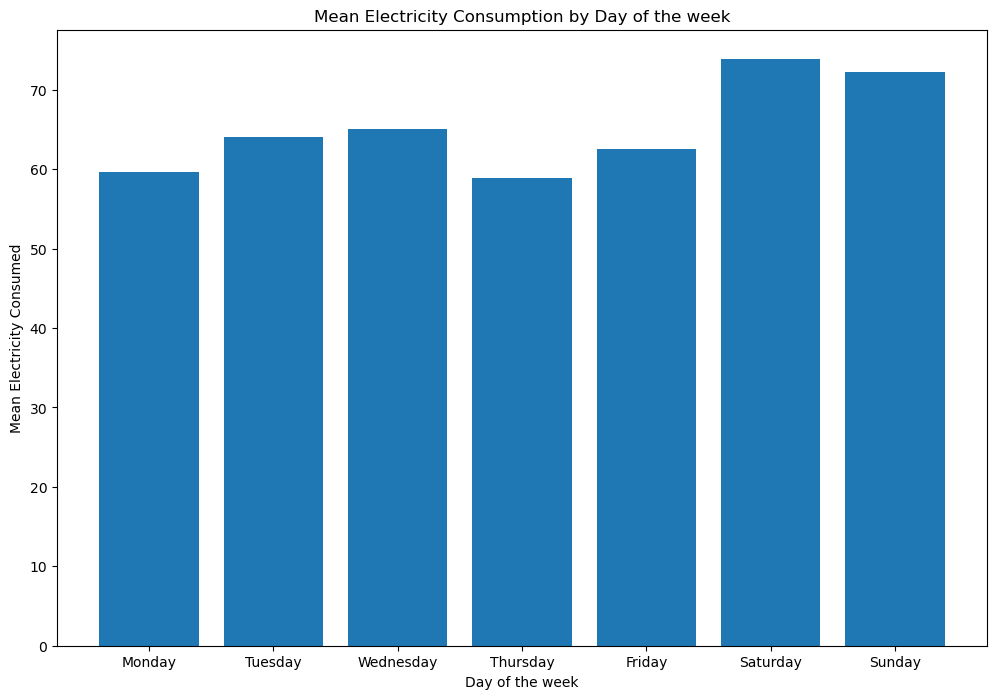

In [33]:
daily_consumption = hourly_data.groupby('day_of_week')['Global_active_power'].mean()
daily_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(daily_consumption.index, daily_consumption.values, tick_label=daily_labels)
plt.xlabel('Day of the week')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Day of the week')
plt.show()

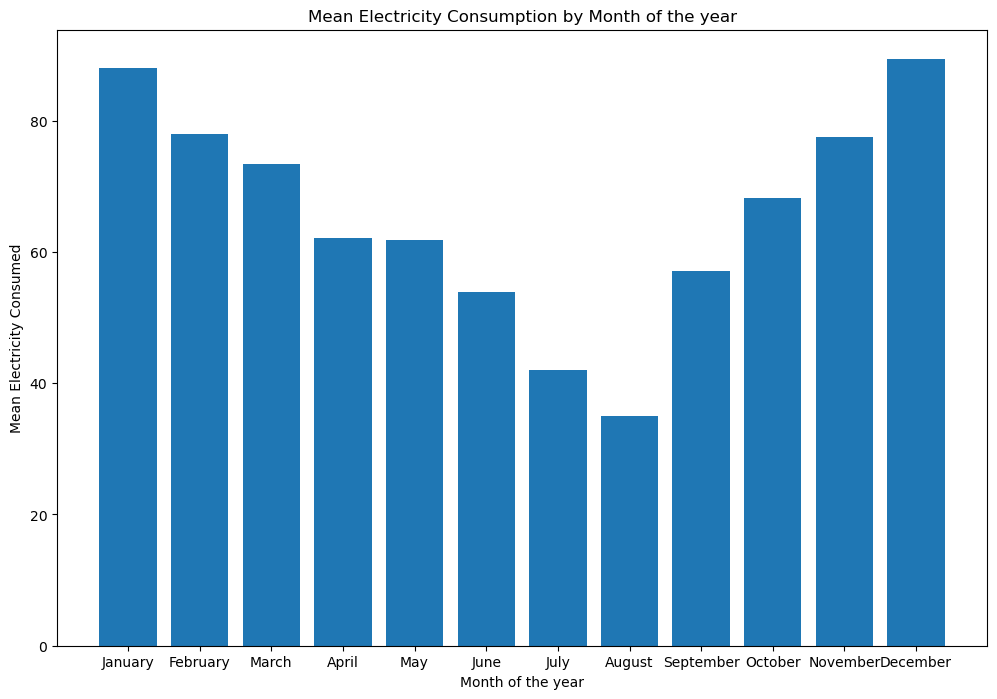

In [34]:
monthly_consumption = hourly_data.groupby('month')['Global_active_power'].mean()
monthly_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                 'September', 'October', 'November', 'December']
plt.bar(monthly_consumption.index, monthly_consumption.values, tick_label=monthly_labels)
plt.xlabel('Month of the year')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Month of the year')
plt.show()

In [35]:
hourly_data['year'].unique()

array([2006, 2007, 2008, 2009, 2010], dtype=int32)

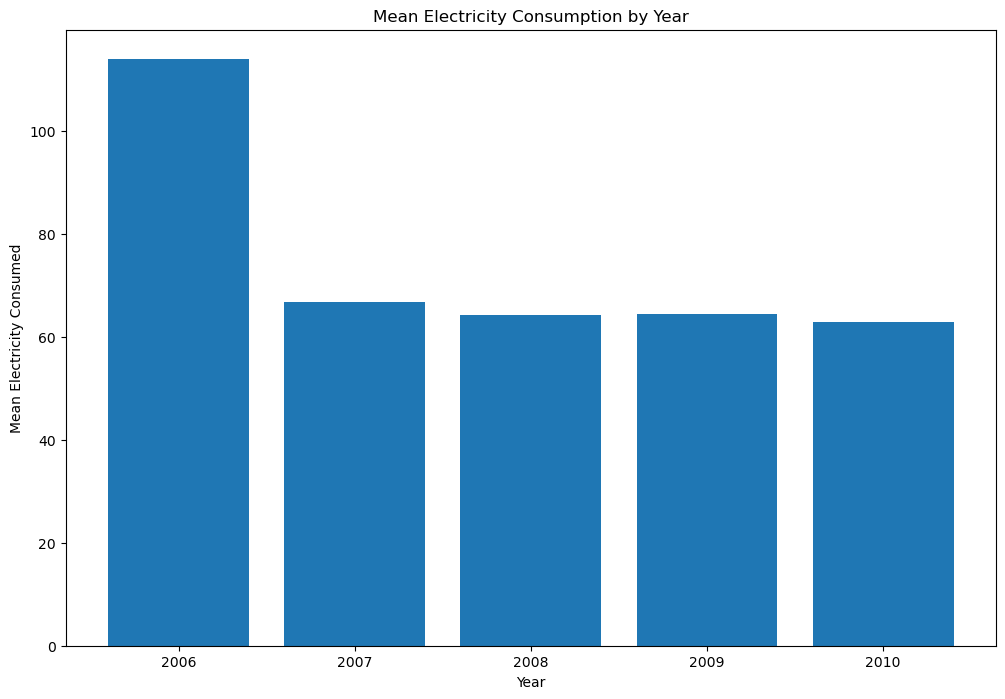

In [36]:
yearly_consumption = hourly_data.groupby('year')['Global_active_power'].mean()
year_labels = ['2006', '2007', '2008', '2009', '2010']
plt.bar(yearly_consumption.index, yearly_consumption.values, tick_label=year_labels)
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Year')
plt.show()

In [37]:
hourly_data.shape

(34589, 24)

In [38]:
hourly_data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'rem_consumption', 'Global_active_power_winsorized',
       'Global_reactive_power_winsorized', 'Voltage_winsorized',
       'Global_intensity_winsorized', 'Sub_metering_1_winsorized',
       'Sub_metering_2_winsorized', 'Sub_metering_3_winsorized',
       'rem_consumption_winsorized', 'hour', 'day_of_week', 'month', 'year',
       'hour_category', 'day_category', 'month_category', 'year_category'],
      dtype='object')

In [39]:
endog_cols = ['Global_active_power_winsorized',
       'Global_reactive_power_winsorized', 'Voltage_winsorized',
       'Global_intensity_winsorized', 'Sub_metering_1_winsorized',
       'Sub_metering_2_winsorized', 'Sub_metering_3_winsorized',
       'rem_consumption_winsorized']
exog_cols = ['hour_category', 'day_category', 'month_category', 'year_category']

In [40]:
train_endog = hourly_data[endog_cols][:30000]
test_endog = hourly_data[endog_cols][-4589:]
train_exog = hourly_data[exog_cols][:30000]
exog_future = hourly_data[exog_cols][-4589:]

In [41]:
model = VAR(endog=train_endog, exog=train_exog)
for i in range(10):
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  62.128233144907924
BIC:  62.13931174845545

Order = 1
AIC:  59.15111128637786
BIC:  59.17991650021774

Order = 2
AIC:  59.01029324963105
BIC:  59.05682611337579

Order = 3
AIC:  58.95401362497166
BIC:  59.01827517833064

Order = 4
AIC:  58.92590565264722
BIC:  59.00789693542667

Order = 5
AIC:  58.885142655297344
BIC:  58.984864707400405

Order = 6
AIC:  58.843778871771754
BIC:  58.96123273319844

Order = 7
AIC:  58.80956091448549
BIC:  58.94474762533273

Order = 8
AIC:  58.78044874682576
BIC:  58.9333693472874

Order = 9
AIC:  58.73546609642261
BIC:  58.90612162678943



In [42]:
results = model.fit(10)

In [43]:
lag_order = results.k_ar
lag_order

10

In [45]:
z = results.forecast(y=train_endog.values[-lag_order:], steps=4589, exog_future=exog_future)
z

array([[3.68509937e+01, 5.90764892e+00, 1.45143288e+04, ...,
        1.57136320e+01, 1.64882941e+02, 4.61290492e+02],
       [6.43600403e+01, 6.99677744e+00, 1.44752136e+04, ...,
        3.49615332e+01, 3.01914520e+02, 6.65409352e+02],
       [8.41170732e+01, 7.44983358e+00, 1.44346163e+04, ...,
        4.31549050e+01, 4.59985511e+02, 7.86724600e+02],
       ...,
       [8.95996331e+01, 7.36714053e+00, 1.44232523e+04, ...,
        5.16596542e+01, 4.81360041e+02, 8.34577938e+02],
       [9.84711168e+01, 7.48382551e+00, 1.44046265e+04, ...,
        5.46779073e+01, 5.43550806e+02, 8.96385314e+02],
       [1.02497377e+02, 7.50609403e+00, 1.43983241e+04, ...,
        5.49243886e+01, 5.82203507e+02, 9.14409100e+02]])

In [54]:
test_endog

,Global_active_power_winsorized,Global_reactive_power_winsorized,Voltage_winsorized,Global_intensity_winsorized,Sub_metering_1_winsorized,Sub_metering_2_winsorized,Sub_metering_3_winsorized,rem_consumption_winsorized
Datetime,,,,,,,,
2010-05-19 17:00:00,24.720,4.994,14587.61,104.4,0.0,28.0,40.0,344.000000
2010-05-19 18:00:00,30.764,5.048,14611.96,128.6,0.0,0.0,89.0,423.733333
2010-05-19 19:00:00,64.258,10.570,14483.36,269.6,0.0,29.0,641.0,400.966667
2010-05-19 20:00:00,139.206,8.258,14406.24,640.0,524.0,0.0,526.0,742.100000
2010-05-19 21:00:00,66.862,10.030,14434.38,279.4,11.0,29.0,39.0,1035.366667
...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,103.554,3.684,14224.18,433.0,0.0,0.0,772.0,953.900000
2010-11-26 18:00:00,94.408,3.222,14251.91,397.2,0.0,0.0,0.0,1573.466667
2010-11-26 19:00:00,99.560,3.602,14204.46,423.4,0.0,4.0,0.0,1655.333333


In [46]:
test_endog.columns

Index(['Global_active_power_winsorized', 'Global_reactive_power_winsorized',
       'Voltage_winsorized', 'Global_intensity_winsorized',
       'Sub_metering_1_winsorized', 'Sub_metering_2_winsorized',
       'Sub_metering_3_winsorized', 'rem_consumption_winsorized'],
      dtype='object')

In [55]:
idx = pd.date_range('2010-05-19 17:00:00', periods=4589, freq='1H')
df_forecast = pd.DataFrame(z, index=idx, columns=test_endog.columns)
df_forecast

,Global_active_power_winsorized,Global_reactive_power_winsorized,Voltage_winsorized,Global_intensity_winsorized,Sub_metering_1_winsorized,Sub_metering_2_winsorized,Sub_metering_3_winsorized,rem_consumption_winsorized
2010-05-19 17:00:00,36.850994,5.907649,14514.328793,156.783367,-10.870046,15.713632,164.882941,461.290492
2010-05-19 18:00:00,64.360040,6.996777,14475.213561,271.509066,43.248795,34.961533,301.914520,665.409352
2010-05-19 19:00:00,84.117073,7.449834,14434.616295,353.985437,69.408310,43.154905,459.985511,786.724600
2010-05-19 20:00:00,89.089882,7.157633,14436.417349,373.848962,79.833386,39.327614,561.189186,784.700301
2010-05-19 21:00:00,88.202992,7.272281,14441.762796,369.791515,91.961468,40.504589,564.589292,734.026110
...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,56.905673,6.405804,14509.500806,239.834956,32.487316,40.251259,329.170325,512.703344
2010-11-26 18:00:00,74.639060,7.130704,14461.040300,314.593243,52.909285,46.962674,397.819047,702.518600
2010-11-26 19:00:00,89.599633,7.367141,14423.252332,377.060483,74.077644,51.659654,481.360041,834.577938
2010-11-26 20:00:00,98.471117,7.483826,14404.626520,413.860979,91.892407,54.677907,543.550806,896.385314


In [56]:
print("RMSE")
for col in test_endog.columns:
    RMSE = rmse(test_endog[col], df_forecast[col])
    print(f'{col}: {RMSE:.3f}')

RMSE
Global_active_power_winsorized: 35.625
Global_reactive_power_winsorized: 3.295
Voltage_winsorized: 130.560
Global_intensity_winsorized: 148.498
Sub_metering_1_winsorized: 130.746
Sub_metering_2_winsorized: 73.302
Sub_metering_3_winsorized: 383.877
rem_consumption_winsorized: 311.107


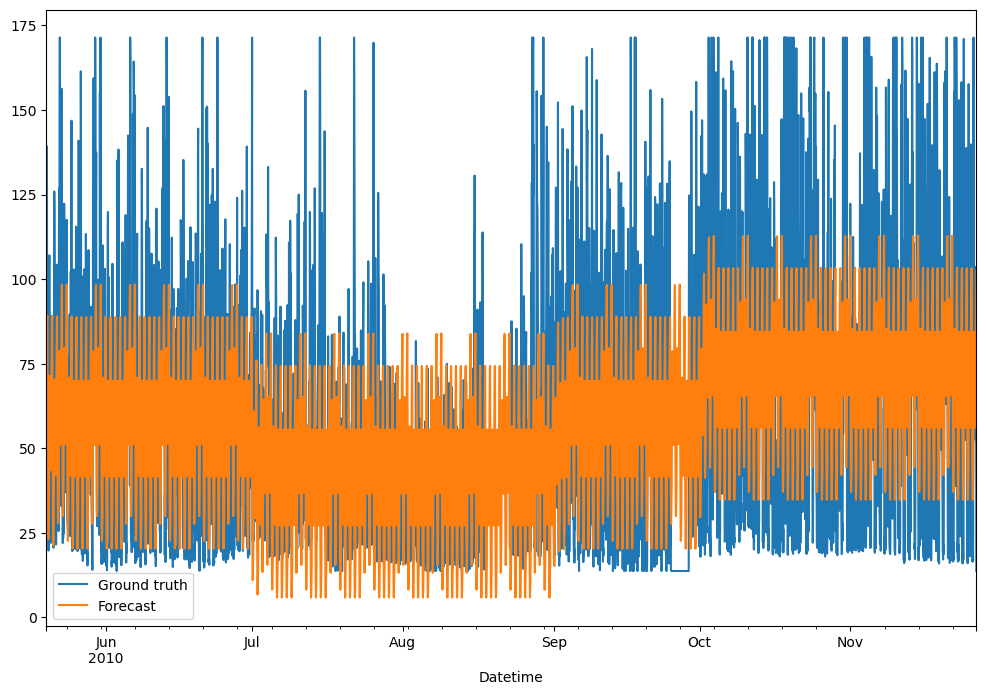

In [57]:
test_endog['Global_active_power_winsorized'].plot(label="Ground truth", legend=True)
df_forecast['Global_active_power_winsorized'].plot(label="Forecast", legend=True);

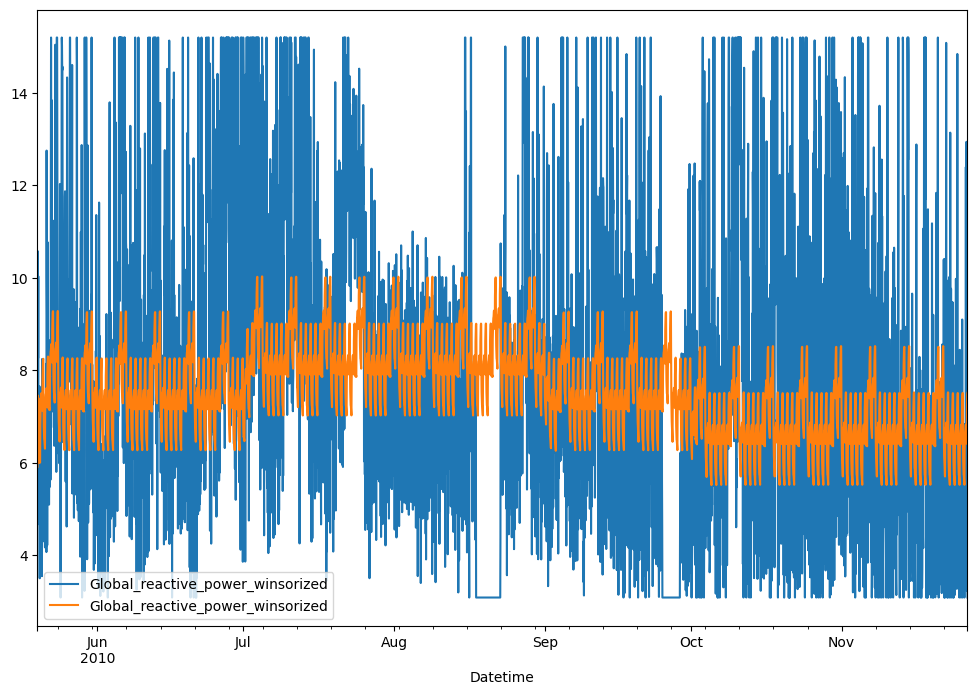

In [58]:
test_endog['Global_reactive_power_winsorized'].plot(legend=True)
df_forecast['Global_reactive_power_winsorized'].plot(legend=True);

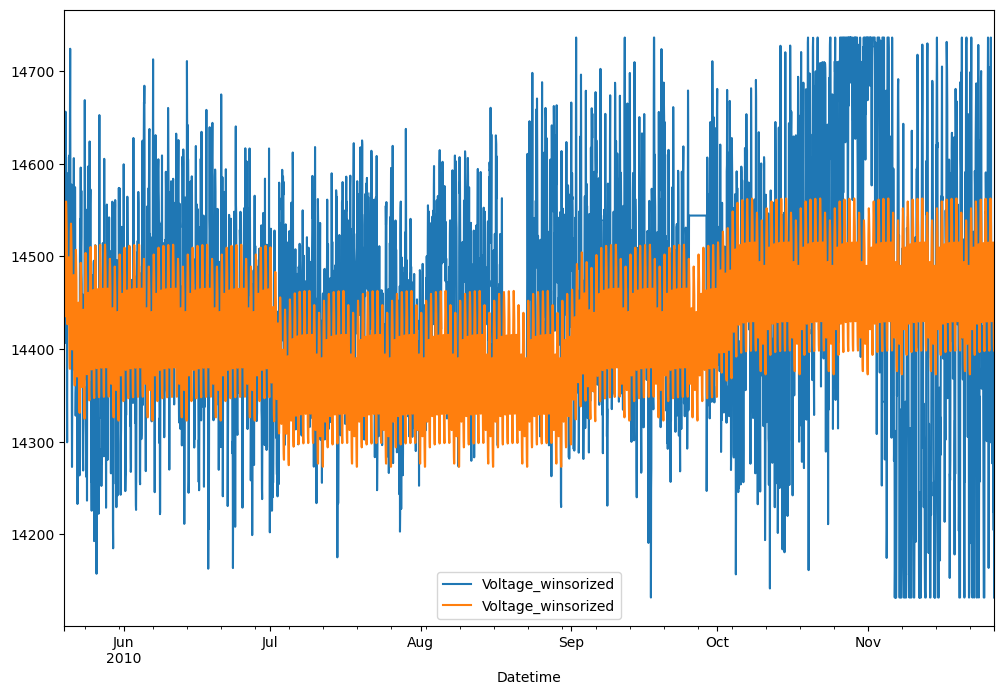

In [59]:
test_endog['Voltage_winsorized'].plot(legend=True)
df_forecast['Voltage_winsorized'].plot(legend=True);

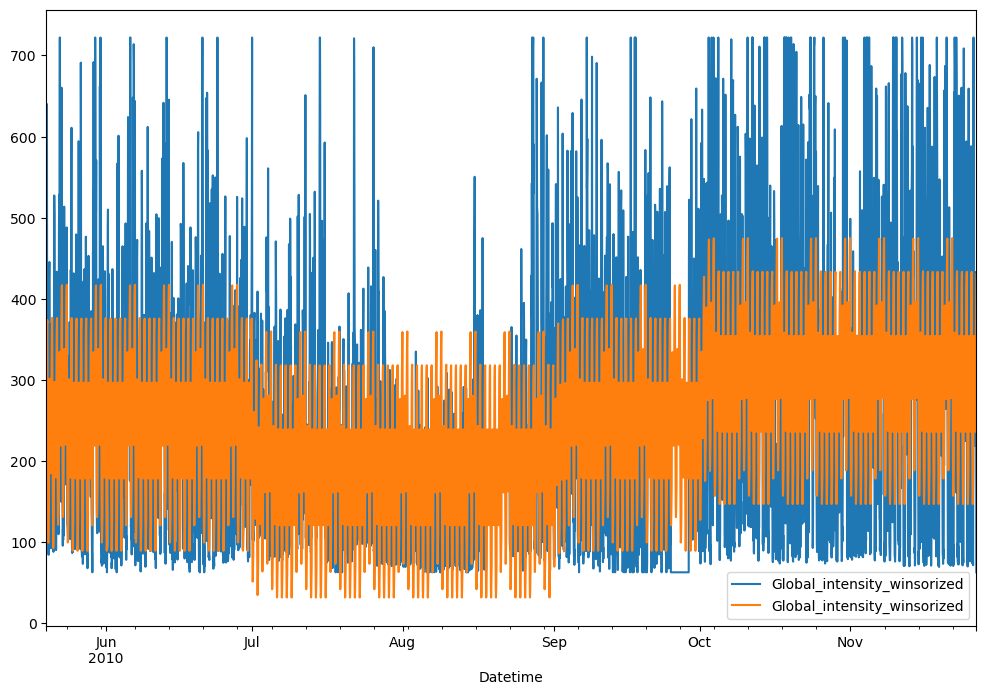

In [60]:
test_endog['Global_intensity_winsorized'].plot(legend=True)
df_forecast['Global_intensity_winsorized'].plot(legend=True);